Total number of rows retrieved: 217415


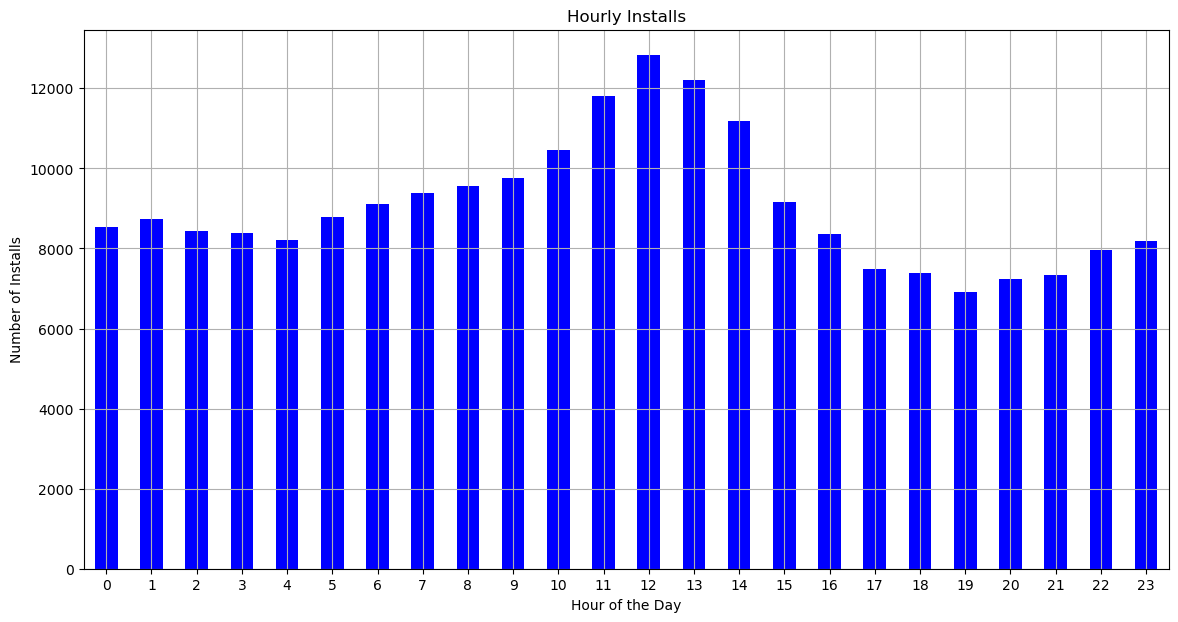

In [5]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the service account JSON file
service_account_path = "C:/Users/GalipŞahin/Desktop/Kişisel/Dream/galipsahin15.json"

# Create a BigQuery client
client = bigquery.Client.from_service_account_json(service_account_path)

# Define the query
query = """
    SELECT * FROM `casedreamgames.Analytics.dataset_install`
"""

# Run the query and get all results as a DataFrame
df = client.query(query).result().to_dataframe()

# Print the number of rows retrieved
print(f"Total number of rows retrieved: {len(df)}")

# Convert date columns to datetime format
if 'event_time' in df.columns:
    df['event_time'] = pd.to_datetime(df['event_time'])

# Add hour information
df['hour'] = df['event_time'].dt.hour

# Group by hours and calculate the number of installs
hourly_installs = df.groupby('hour').size()

# Create a bar plot
plt.figure(figsize=(14, 7))
hourly_installs.plot(kind='bar', color='blue')
plt.title('Hourly Installs')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Installs')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


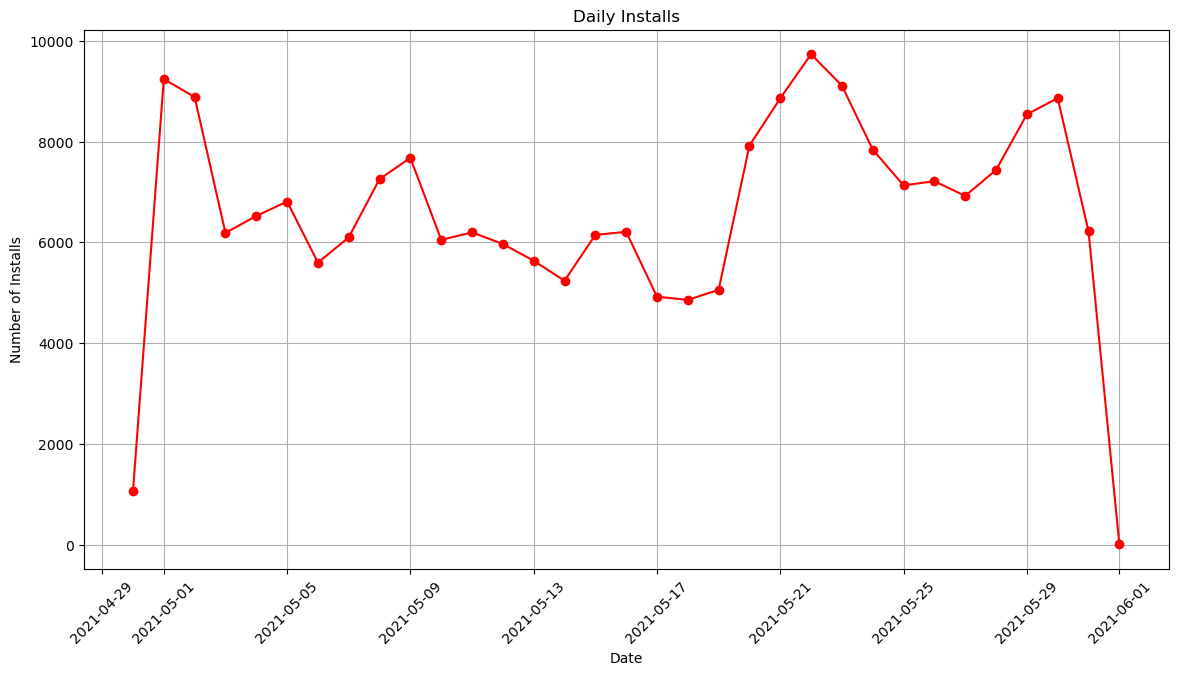

In [7]:
# Convert date columns to datetime format
if 'event_time' in df.columns:
    df['event_time'] = pd.to_datetime(df['event_time'])

df['date'] = df['event_time'].dt.date

# Daily Installs
daily_installs = df.groupby('date').size()

plt.figure(figsize=(14, 7))
daily_installs.plot(kind='line', marker='o', color='red')
plt.title('Daily Installs')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217415 entries, 0 to 217414
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   event_time  217415 non-null  datetime64[ns, UTC]
 1   user_id     217415 non-null  object             
 2   platform    217415 non-null  object             
 3   network     217415 non-null  object             
 4   country     217415 non-null  object             
 5   hour        217415 non-null  int64              
 6   date        217415 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 11.6+ MB
None


C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_17880\1125254810.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


                              event_time          user_id platform network  \
count                             217415           217415   217415  217415   
unique                            217408           215082        2       5   
top     2021-05-31 08:24:31.679000+00:00  hft3152136194rm      ios    Buzz   
freq                                   2                3   115439  122093   
first   2021-04-30 21:00:00.325000+00:00              NaN      NaN     NaN   
last    2021-06-01 10:21:19.183000+00:00              NaN      NaN     NaN   
mean                                 NaN              NaN      NaN     NaN   
std                                  NaN              NaN      NaN     NaN   
min                                  NaN              NaN      NaN     NaN   
25%                                  NaN              NaN      NaN     NaN   
50%                                  NaN              NaN      NaN     NaN   
75%                                  NaN              NaN      N

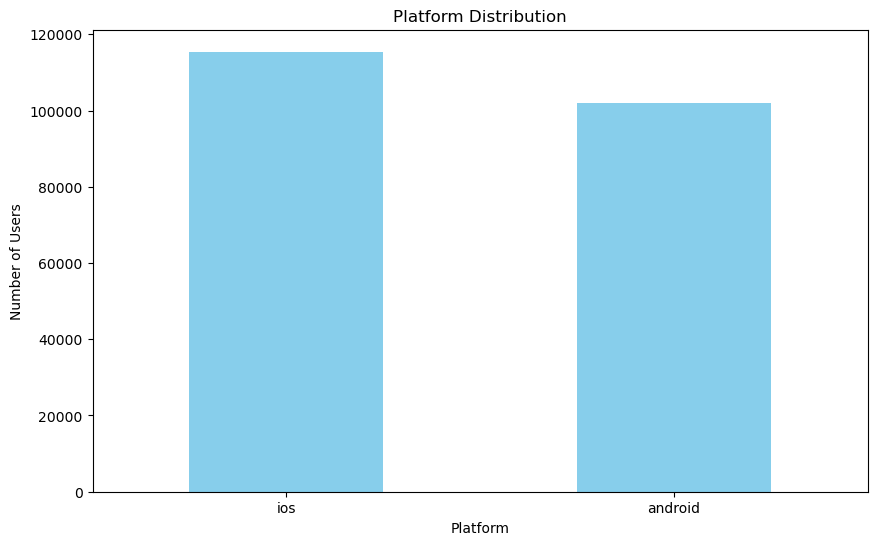

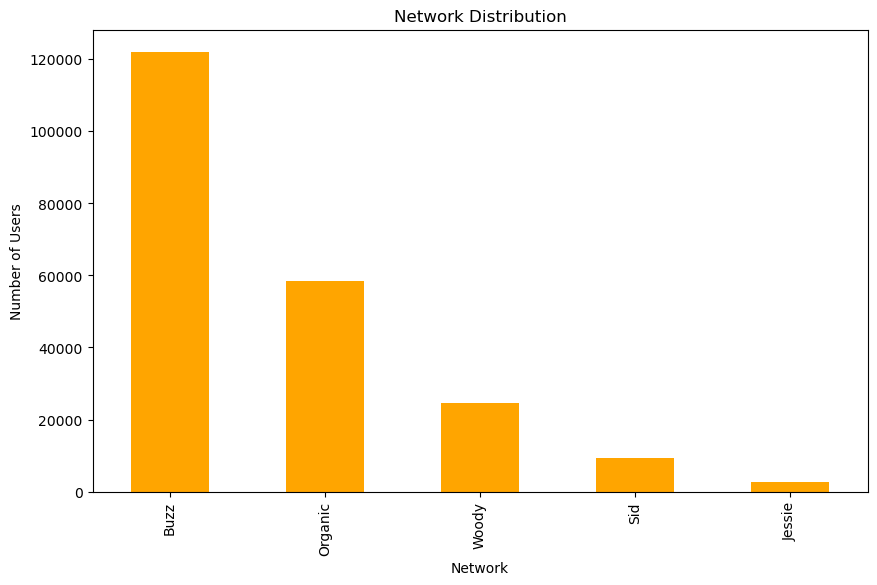

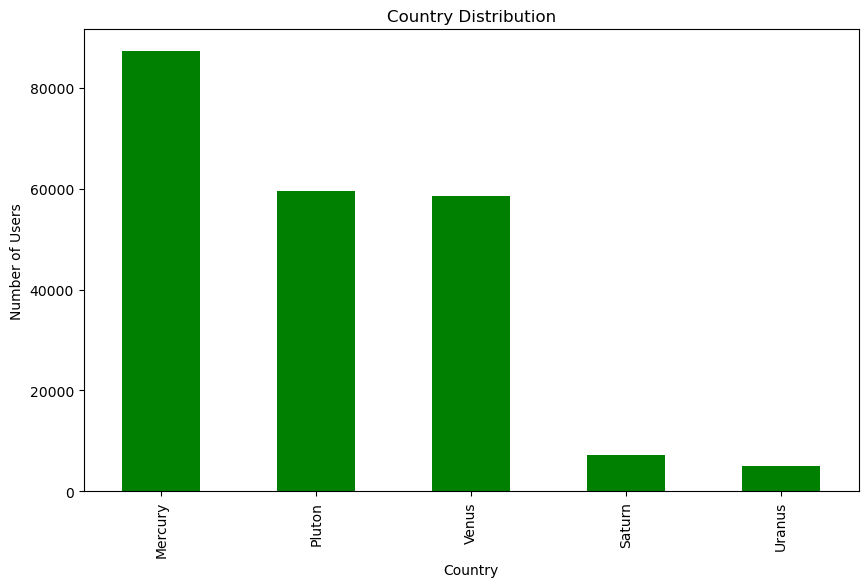

In [9]:
# Display basic information
print(df.info())
print(df.describe(include='all'))

# Convert date columns to datetime format
if 'event_time' in df.columns:
    df['event_time'] = pd.to_datetime(df['event_time'])

# Platform distribution
platform_distribution = df['platform'].value_counts()
plt.figure(figsize=(10, 6))
platform_distribution.plot(kind='bar', color='skyblue')
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Network distribution
network_distribution = df['network'].value_counts()
plt.figure(figsize=(10, 6))
network_distribution.plot(kind='bar', color='orange')
plt.title('Network Distribution')
plt.xlabel('Network')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

# Country distribution
country_distribution = df['country'].value_counts()
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='green')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x700 with 0 Axes>

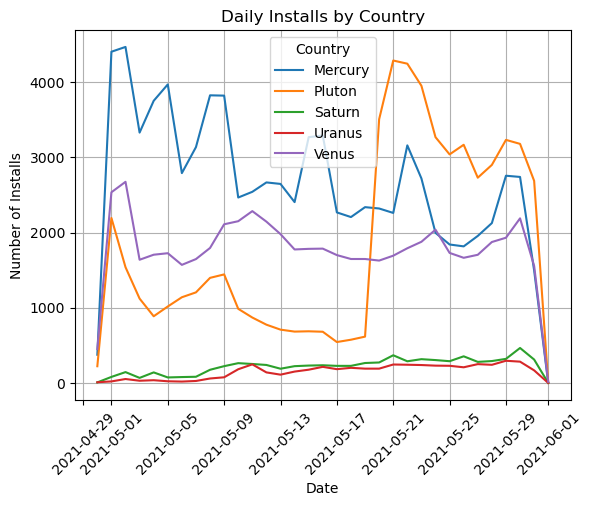

<Figure size 1400x700 with 0 Axes>

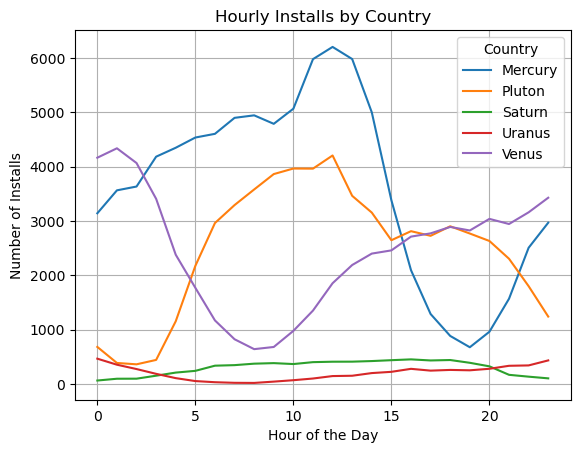

In [11]:
# Convert date columns to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Add date and hour columns
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour

# Daily installs by country
country_daily_installs = df.groupby(['date', 'country']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
country_daily_installs.plot(kind='line')
plt.title('Daily Installs by Country')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Hourly installs by country
country_hourly_installs = df.groupby(['hour', 'country']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
country_hourly_installs.plot(kind='line')
plt.title('Hourly Installs by Country')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Installs')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


In [ ]:
#PLATFORM BAZLI GÜNLÜK VE SAATLİK YÜKLEMELER

<Figure size 1400x700 with 0 Axes>

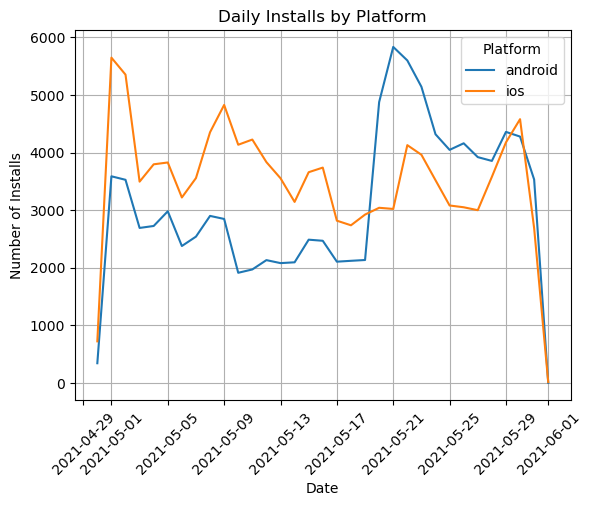

<Figure size 1400x700 with 0 Axes>

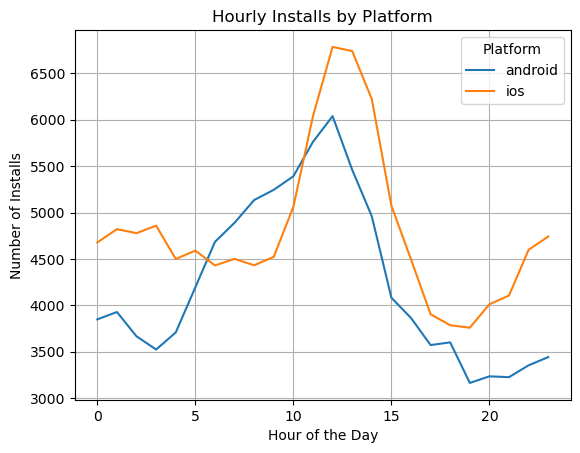

In [12]:
# Convert date columns to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Add date and hour columns
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour

# Daily installs by platform
platform_daily_installs = df.groupby(['date', 'platform']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
platform_daily_installs.plot(kind='line')
plt.title('Daily Installs by Platform')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend(title='Platform')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Hourly installs by platform
platform_hourly_installs = df.groupby(['hour', 'platform']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
platform_hourly_installs.plot(kind='line')
plt.title('Hourly Installs by Platform')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Installs')
plt.legend(title='Platform')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x700 with 0 Axes>

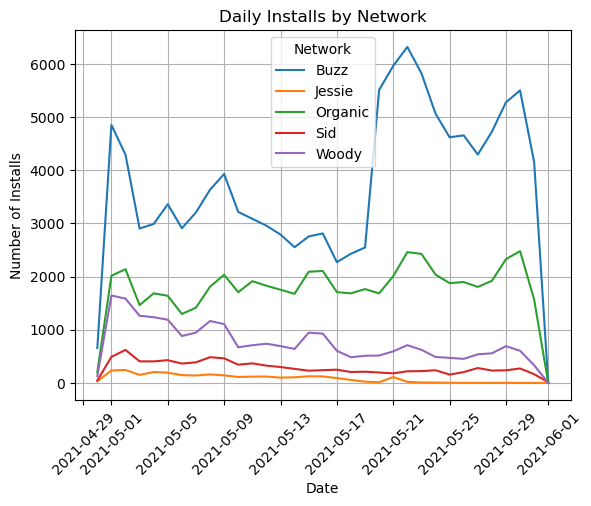

<Figure size 1400x700 with 0 Axes>

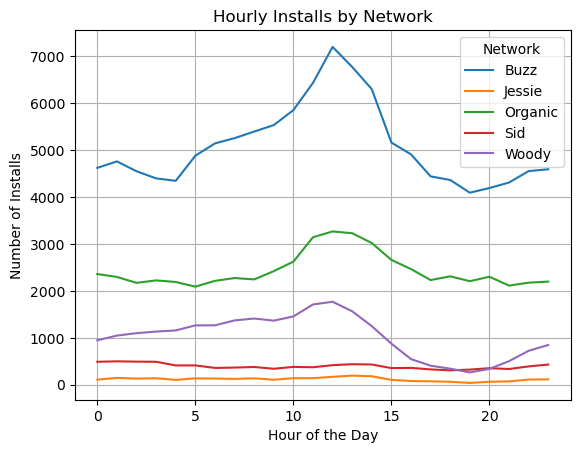

In [13]:
# Convert date columns to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Add date and hour columns
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour

# Daily installs by network
network_daily_installs = df.groupby(['date', 'network']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
network_daily_installs.plot(kind='line')
plt.title('Daily Installs by Network')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend(title='Network')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Hourly installs by network
network_hourly_installs = df.groupby(['hour', 'network']).size().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
network_hourly_installs.plot(kind='line')
plt.title('Hourly Installs by Network')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Installs')
plt.legend(title='Network')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()
